In [1]:
from _tests import scripts
from scripts.notebook_utils import *

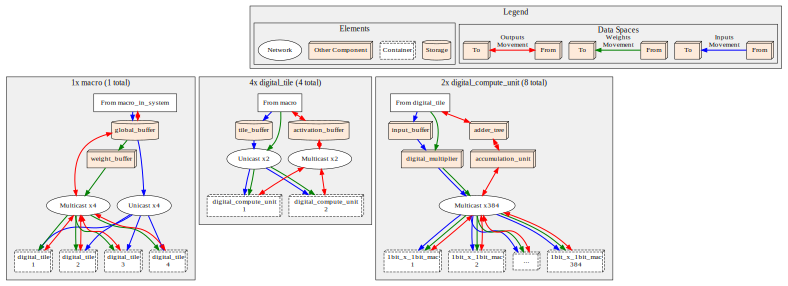

In [2]:
ARCH_PATH = "/home/workspace/models/arch/1_macro/lightening_ieee_2024/arch.yaml"
display_diagram(get_diagram("lightening_ieee_2024", ignore=DIAGRAM_DEFAULT_IGNORE))

In [3]:
import matplotlib.pyplot as plt

comp_map_area = {
    "global_buffer": "Mem",
    "weight_modulator": "MZM",
    "input_modulator": "MZM",
    "weight_dac": "DAC",
    "input_dac": "DAC",
    "laser_source": "Laser&Comb",
    "micro_comb": "Laser&Comb",
    "output_adc": "ADC",
    "tile_buffer": "Photonic core",
    "activation_buffer": "Photonic core",
    "optical_awg": "Photonic core",
    "accumulation_unit": "Photonic core",
    "photodetector_array": "Photonic core",
    "weight_buffer": "Mem",
    "input_buffer": "Photonic core",
    "digital_multiplier": "Digital core",
    "adder_tree": "Digital core"
}

comp_map_energy = {
    "global_buffer": "Mem",
    "weight_modulator": "MZM",
    "input_modulator": "MZM",
    "weight_dac": "DAC",
    "input_dac": "DAC",
    "laser_source": "Laser",
    "micro_comb": "Other",
    "output_adc": "ADC",
    "tile_buffer": "Photonic core",
    "activation_buffer": "Photonic core",
    "optical_awg": "Photonic core",
    "accumulation_unit": "Photonic core",
    "photodetector_array": "Photodetector",
    "weight_buffer": "Mem",
    "input_buffer": "Photonic core",
    "digital_multiplier": "Digital core",
    "adder_tree": "Digital core"
}
def get_info():
    spec = get_spec("lightening_ieee_2024")
    spec.variables["MAX_UTILIZATION"] = True
    results = run_mapper(spec, "my_spec")
    
    print(dir(results))
    for attr in dir(results):
        if not attr.startswith("_"):
            try:
                print(f"{attr}: {getattr(results, attr)}")
            except Exception:
                pass    

def get_area_energy():
    spec = get_spec("lightening_ieee_2024")
    spec.variables["MAX_UTILIZATION"] = True
    results = run_mapper(spec, "my_spec")

    areas = {"Mem":0, "Photonic core":0,"Laser&Comb":0,"MZM":0,"ADC":0,"DAC":0,"Digital core":0}
    energies = {"Mem":0, "Photonic core":0,"Laser":0,"MZM":0,"ADC":0,"DAC":0,"Other":0,"Photodetector":0,"Digital core":0}

    for k, v in results.per_component_area.items():
        if v > 0 and k in comp_map_area:
            areas[comp_map_area[k]] += v * 1e6  # mm²

    for k, v in results.per_component_energy.items():
        if v > 0 and k in comp_map_energy:
            energies[comp_map_energy[k]] += v * 1e12  # pJ

    return areas, energies

def plot_pie(data_dict, title, unit):
    labels = []
    sizes = []
    total_value = sum(data_dict.values())
    for k, v in sorted(data_dict.items(), key=lambda x: -x[1]):
        if v < 1e-3:
            continue
        labels.append(f"{k} ({v:.2f} {unit})")
        sizes.append(v)

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, startangle=90, autopct='%1.1f%%')
    plt.title(f"{title}\nTotal: {total_value:.2f} {unit}")
    plt.tight_layout()
    plt.show()

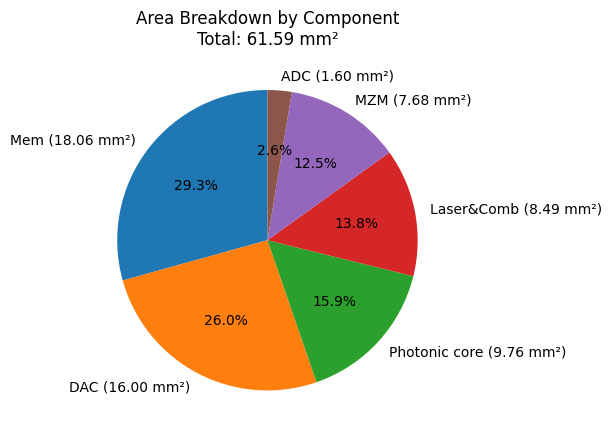

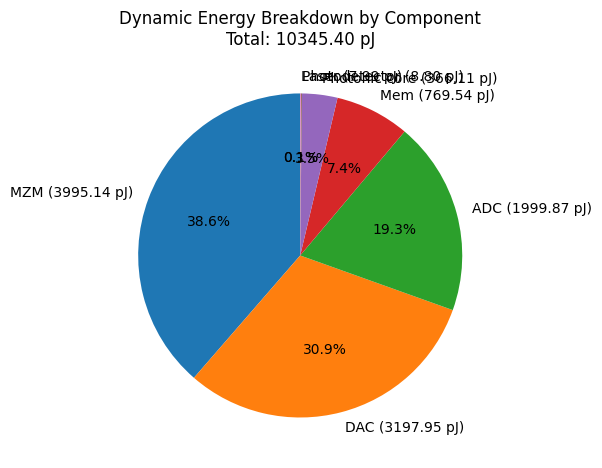

In [44]:
# get_info()
areas, energies = get_area_energy()
plot_pie(areas, "Area Breakdown by Component", "mm²")
plot_pie(energies, "Dynamic Energy Breakdown by Component", "pJ")

In [28]:
!/usr/local/bin/accelergy /home/workspace/outputs/236.281473445815328/parsed-processed-input.yaml --oprefix timeloop-mapper.

2025-05-04 23:47:36 INFO            _                _                      
2025-05-04 23:47:36 INFO           / \   ___ ___ ___| | ___ _ __ __ _ _   _ 
2025-05-04 23:47:36 INFO          / _ \ / __/ __/ _ \ |/ _ \ '__/ _` | | | |
2025-05-04 23:47:36 INFO         / ___ \ (_| (_|  __/ |  __/ | | (_| | |_| |
2025-05-04 23:47:36 INFO        /_/   \_\___\___\___|_|\___|_|  \__, |\__, |
2025-05-04 23:47:36 INFO                                        |___/ |___/ 
2025-05-04 23:47:36 INFO        generating outputs according to the following specified output flags... 
2025-05-04 23:47:36 INFO         Please use the -f flag to update the preference (default to all output files)
2025-05-04 23:47:36 INFO        {'ERT': 1, 'ERT_summary': 1, 'ART': 1, 'ART_summary': 1, 'energy_estimation': 1, 'flattened_arch': 1}
2025-05-04 23:47:36 INFO        Located config file at /home/workspace/.config/accelergy/accelergy_config.yaml.
2025-05-04 23:47:36 INFO        config file located:
2025-05-04 23:47:36 INF

In [41]:
print("### digital ###")

### digital ###


In [ ]:
print(get_area_energy())
areas, energies = get_area_energy()
plot_pie(areas, "Area Breakdown by Component", "mm²")
plot_pie(energies, "Dynamic Energy Breakdown by Component", "pJ")

({'Mem': 18.0905381, 'Photonic core': 9.775973184, 'Laser&Comb': 0, 'MZM': 0, 'ADC': 0, 'DAC': 0, 'Digital core': 0.05808839200000001}, {'Mem': 781.00992, 'Photonic core': 449.11549440000005, 'Laser': 0, 'MZM': 0, 'ADC': 0, 'DAC': 0, 'Other': 0, 'Photodetector': 0, 'Digital core': 17.07264})


In [7]:
print("### old code ###")

### old code ###


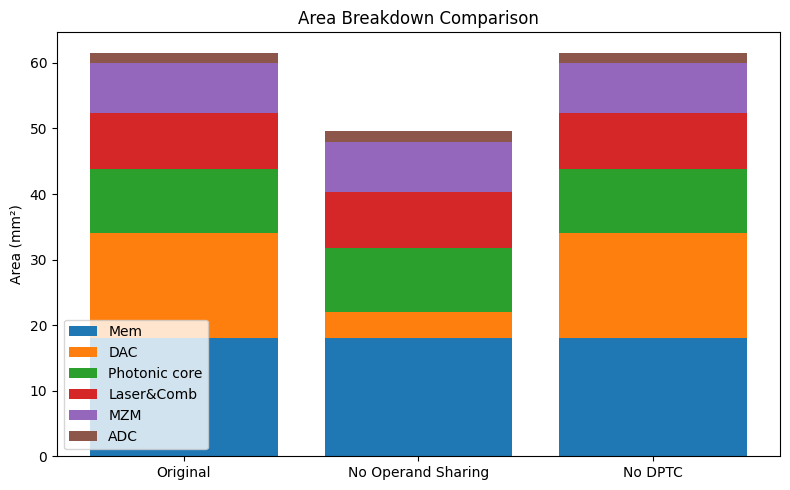

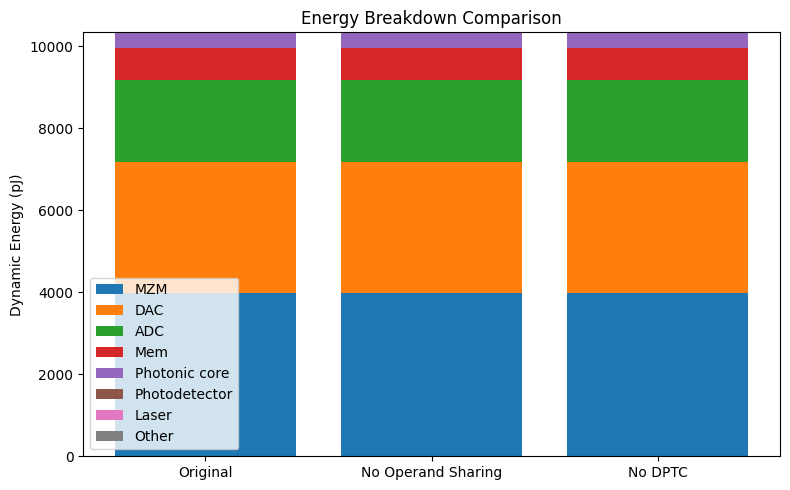

In [22]:
from pathlib import Path
import yaml
import matplotlib.pyplot as plt
# from timeloop import get_spec, run_mapper

ARCH_DIR = Path("/home/workspace/models/arch/1_macro/lightening_ieee_2024")
VARIABLES_FILE = ARCH_DIR / "variables_free.yaml"

ARCHITECTURES = {
    "Original": ARCH_DIR / "arch.yaml",
    "No Operand Sharing": ARCH_DIR / "arch.yaml",
    "No DPTC": ARCH_DIR / "arch_no_dptc.yaml"
}

def set_tiling_factor(factor):
    with open(VARIABLES_FILE, "r") as f:
        data = yaml.safe_load(f)
    data["variables"]["TILING_FACTOR"] = factor
    with open(VARIABLES_FILE, "w") as f:
        yaml.dump(data, f)

comp_map_area = {
    "global_buffer":"Mem",
    "weight_modulator":"MZM",
    "input_modulator":"MZM",
    "weight_dac":"DAC",
    "input_dac": "DAC",
    "laser_source":"Laser&Comb",
    "micro_comb":"Laser&Comb",
    "output_adc":"ADC",
    "tile_buffer":"Photonic core",
    "activation_buffer":"Photonic core",
    "optical_awg":"Photonic core",
    "accumulation_unit":"Photonic core",
    "photodetector_array":"Photonic core",
    "digital_mac_array":"Photonic core"
}

comp_map_energy = {
    "global_buffer":"Mem",
    "weight_modulator":"MZM",
    "input_modulator":"MZM",
    "weight_dac":"DAC",
    "input_dac": "DAC",
    "laser_source":"Laser",
    "micro_comb":"Other",
    "output_adc":"ADC",
    "tile_buffer":"Photonic core",
    "activation_buffer":"Photonic core",
    "optical_awg":"Photonic core",
    "accumulation_unit":"Photonic core",
    "photodetector_array":"Photodetector",
    "digital_mac_array":"Photonic core"
}

def collect_results(label, arch_path):
    spec = get_spec("lightening_ieee_2024")
    spec.arch = arch_path
    spec.variables["MAX_UTILIZATION"] = True
    results = run_mapper(spec, "spec_" + label.replace(" ", "_").lower())

    areas = {"Mem":0, "Photonic core":0,"Laser&Comb":0,"MZM":0,"ADC":0,"DAC":0}
    energies = {"Mem":0, "Photonic core":0,"Laser":0,"MZM":0,"ADC":0,"DAC":0,"Other":0,"Photodetector":0}

    for k, v in results.per_component_area.items():
        if v > 0 and k in comp_map_area:
            areas[comp_map_area[k]] += v * 1e6

    for k, v in results.per_component_energy.items():
        if v > 0 and k in comp_map_energy:
            energies[comp_map_energy[k]] += v * 1e12

    return areas, energies

def plot_stacked_bar(results_dict, title, ylabel, unit):
    labels = list(results_dict.keys())
    keys = sorted(next(iter(results_dict.values())).keys(), key=lambda k: -sum(r[k] for r in results_dict.values()))

    data = {k: [results_dict[arch].get(k, 0) for arch in labels] for k in keys}

    bottom = [0] * len(labels)
    plt.figure(figsize=(8, 5))
    for k in keys:
        plt.bar(labels, data[k], bottom=bottom, label=k)
        bottom = [bottom[i] + data[k][i] for i in range(len(labels))]

    plt.ylabel(f"{ylabel} ({unit})")
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Set operand sharing version (edit variables_free.yaml)
set_tiling_factor(1)
areas_no_share, energies_no_share = collect_results("No Operand Sharing", ARCHITECTURES["No Operand Sharing"])

# Restore original tiling factor for other runs
set_tiling_factor(4)
areas_orig, energies_orig = collect_results("Original", ARCHITECTURES["Original"])
areas_no_dptc, energies_no_dptc = collect_results("No DPTC", ARCHITECTURES["No DPTC"])

area_results = {
    "Original": areas_orig,
    "No Operand Sharing": areas_no_share,
    "No DPTC": areas_no_dptc
}

energy_results = {
    "Original": energies_orig,
    "No Operand Sharing": energies_no_share,
    "No DPTC": energies_no_dptc
}

plot_stacked_bar(area_results, "Area Breakdown Comparison", "Area", "mm²")
plot_stacked_bar(energy_results, "Energy Breakdown Comparison", "Dynamic Energy", "pJ")
